### ==========================Импорт Библиотек==========================

In [115]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler

In [3]:
# Magic commands
%matplotlib inline 
# вывод графики в ноутбук
%config InlineBackend.figure_format = 'svg' 
# более четкое отображение, формат фала фигуры svg

### ==========================Импорт данных==========================

In [4]:
df_train = pd.read_csv('import/train.csv') # загружаем тренировочный датасет в датафрейм df_train
df_test = pd.read_csv('import/test.csv') # загружаем тестовый датасет в датафрейм df_test
df_sample_submission = pd.read_csv('import/sample_submission.csv')

In [92]:
# Удаляем цену и ИД и создаем ДатаФрейм X
X = df_train.drop(['Price','Id'], axis=1)
y = df_train[['Price']]

In [79]:
X.head(50)

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2
0,35,2.0,47.981561,29.442751,6.0,7,9.0,1969,0.089040,B,B,33,7976,5,NaN,0,11,B
1,41,3.0,65.683640,40.049543,8.0,7,9.0,1978,0.000070,B,B,46,10309,1,240.0,1,16,B
2,53,2.0,44.947953,29.197612,0.0,8,12.0,1968,0.049637,B,B,34,7759,0,229.0,1,3,B
3,58,2.0,53.352981,52.731512,9.0,8,17.0,1977,0.437885,B,B,23,5735,3,1084.0,0,5,B
4,99,1.0,39.649192,23.776169,7.0,11,12.0,1976,0.012339,B,B,35,5776,1,2078.0,2,4,B
5,59,3.0,80.384479,46.683720,12.0,5,17.0,2011,0.309479,B,B,35,7715,4,990.0,0,6,B
6,154,2.0,62.254114,37.160377,7.0,3,5.0,1960,0.460556,B,B,20,4386,14,NaN,1,5,B
7,74,2.0,80.312926,NaN,0.0,14,0.0,1977,0.075779,B,B,6,1437,3,NaN,0,2,B
8,1,2.0,64.511437,NaN,1.0,9,17.0,1977,0.007122,B,B,1,264,0,NaN,0,1,B
9,23,1.0,46.461409,18.915552,8.0,13,17.0,2014,0.075779,B,B,6,1437,3,NaN,0,2,B


### ==============================ОЧИСТКА==============================

In [122]:
class Cleaner:
    
    
    def __init__(self):
        print(type(self))

    
    def numb_rooms(self, X):
        missing_rooms_data = X.loc[ (X['Rooms'] ==0) | (X['Rooms'] > 6), ['Square', 'Rooms']]
        if missing_rooms_data['Square'].count() !=0:
            for i in missing_rooms_data.index:
                if (missing_rooms_data.loc[(i),'Square']) < 43:
                    (missing_rooms_data.loc[(i),'Rooms']) = 1
                elif (missing_rooms_data.loc[(i),'Square']) < 60:
                    (missing_rooms_data.loc[(i),'Rooms']) = 2
                elif (missing_rooms_data.loc[(i),'Square']) < 100:
                    (missing_rooms_data.loc[(i),'Rooms']) = 3
                elif (missing_rooms_data.loc[(i),'Square']) > 100:
                    (missing_rooms_data.loc[(i),'Rooms']) = 4
            X.loc[ (X['Rooms'] ==0) | (X['Rooms'] > 6), 'Rooms'] = missing_rooms_data['Rooms']
        return X
    
    
    
    def kitchen(self, X): #  Преобразовываем экстремальные данные площади кухни
        
        # Делаем выборку наблюдений, где площадь кухни больше площади всей квартиры, либо <5м, либо >50 
        var_kitchen = X.loc[(X['Square'] < X['KitchenSquare']) | 
                    (X['KitchenSquare'] < 5) | 
                    (X['KitchenSquare'] > 50), 
                    ['KitchenSquare','Square']]
        
        # если в выборку попали наблюдения, то умножаем площадь квартиры на 0.14 и записываем в KitchenSquare
        if var_kitchen['Square'].count() !=0:
            #print('ok')
            for i in var_kitchen.index:
                var_kitchen.loc[(i), 'KitchenSquare'] = round((var_kitchen.loc[(i), 'Square']) * 0.14)
        X.loc[(X['Square'] < X['KitchenSquare']) | 
                    (X['KitchenSquare'] < 5) | 
                    (X['KitchenSquare'] > 50), 
                    'KitchenSquare'] = var_kitchen['KitchenSquare'] 
        return X
    
    
    def LifeSquare_clean(self, X): #  Преобразовываем экстремальные данные площади жилой
        missing_lifesquare = X.loc[(X['LifeSquare'] == 0) | 
                                   (X['LifeSquare'] > X['Square']), 
                                   ['Square', 'LifeSquare']]
        if missing_lifesquare['LifeSquare'].count() !=0:
            for i in missing_lifesquare.index:
                missing_lifesquare.loc[(i), 'LifeSquare'] = round((missing_lifesquare.loc[(i), 'Square']) * 0.64)
        X.loc[(X['LifeSquare'] == 0) | 
              (X['LifeSquare'] > X['Square']), 
              'LifeSquare'] = missing_lifesquare['LifeSquare']
        return X
    
    
    def transform_years_house(self, X):
        if 'HouseYear' in X.keys():
            X['age_house'] = (2020 - X['HouseYear'])
            #X.drop(['HouseYear'], axis=1)
        return X
    
    
    #def del_year_house(self, X):
    #    if 'HouseYear' in X.keys():
    #        X.drop('HouseYear', axis=1)
    #    return X
    
    
    def house_age(self, X):
        var_house_age = X.loc[(X['age_house'] < 0) |(X['age_house'] > 110) ,'age_house']
        for i in var_house_age['age_house']:
            print('ok')
        return X

In [95]:
X

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2
0,35,2.0,47.981561,29.442751,6.0,7,9.0,1969,0.089040,B,B,33,7976,5,NaN,0,11,B
1,41,3.0,65.683640,40.049543,8.0,7,9.0,1978,0.000070,B,B,46,10309,1,240.0,1,16,B
2,53,2.0,44.947953,29.197612,0.0,8,12.0,1968,0.049637,B,B,34,7759,0,229.0,1,3,B
3,58,2.0,53.352981,52.731512,9.0,8,17.0,1977,0.437885,B,B,23,5735,3,1084.0,0,5,B
4,99,1.0,39.649192,23.776169,7.0,11,12.0,1976,0.012339,B,B,35,5776,1,2078.0,2,4,B
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,32,2.0,50.401785,30.476203,5.0,6,5.0,1968,0.135650,B,B,46,7960,6,350.0,3,11,B
9996,18,1.0,41.521546,20.539216,9.0,13,13.0,2000,0.000000,B,B,30,5562,0,NaN,0,5,A
9997,27,1.0,47.939008,NaN,1.0,12,16.0,2015,0.072158,B,B,2,629,1,NaN,0,0,A
9998,75,2.0,43.602562,33.840147,8.0,1,5.0,1961,0.307467,B,A,30,5048,9,325.0,2,5,B


In [123]:
X_clean = Cleaner()

<class '__main__.Cleaner'>


In [105]:
X = X_clean.transform_years_house(X)

In [113]:
X.drop('HouseYear', axis=1)

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,age_house
0,35,2.0,47.981561,29.442751,6.0,7,9.0,0.089040,B,B,33,7976,5,NaN,0,11,B,51
1,41,3.0,65.683640,40.049543,8.0,7,9.0,0.000070,B,B,46,10309,1,240.0,1,16,B,42
2,53,2.0,44.947953,29.197612,0.0,8,12.0,0.049637,B,B,34,7759,0,229.0,1,3,B,52
3,58,2.0,53.352981,52.731512,9.0,8,17.0,0.437885,B,B,23,5735,3,1084.0,0,5,B,43
4,99,1.0,39.649192,23.776169,7.0,11,12.0,0.012339,B,B,35,5776,1,2078.0,2,4,B,44
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,32,2.0,50.401785,30.476203,5.0,6,5.0,0.135650,B,B,46,7960,6,350.0,3,11,B,52
9996,18,1.0,41.521546,20.539216,9.0,13,13.0,0.000000,B,B,30,5562,0,NaN,0,5,A,20
9997,27,1.0,47.939008,NaN,1.0,12,16.0,0.072158,B,B,2,629,1,NaN,0,0,A,5
9998,75,2.0,43.602562,33.840147,8.0,1,5.0,0.307467,B,A,30,5048,9,325.0,2,5,B,59


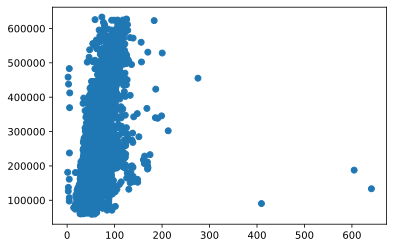

In [114]:
plt.scatter(X['Square'], y['Price'])

plt.show()

In [116]:
# Заменяем в наблюдениях по признаку Shops_2  буквы A и B на цифры 0 и 1
Shops_2_map = {
    "B": 1,
    "A": 0,
}

X["Shops_2"] = X["Shops_2"].map(Shops_2_map) 

# Заменяем в наблюдениях по признаку Ecology_2  буквы A и B на цифры 0 и 1
Ecology_2_map = {
    "B": 1,
    "A": 0,
}

X["Ecology_2"] = X["Ecology_2"].map(Ecology_2_map)

# Заменяем в наблюдениях по признаку Ecology_3  буквы A и B на цифры 0 и 1
Ecology_3_map = {
    "B": 1,
    "A": 0,
}

X["Ecology_3"] = X["Ecology_3"].map(Ecology_3_map)

In [117]:
X

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,age_house
0,35,2.0,47.981561,29.442751,6.0,7,9.0,1969,0.089040,1,1,33,7976,5,NaN,0,11,1,51
1,41,3.0,65.683640,40.049543,8.0,7,9.0,1978,0.000070,1,1,46,10309,1,240.0,1,16,1,42
2,53,2.0,44.947953,29.197612,0.0,8,12.0,1968,0.049637,1,1,34,7759,0,229.0,1,3,1,52
3,58,2.0,53.352981,52.731512,9.0,8,17.0,1977,0.437885,1,1,23,5735,3,1084.0,0,5,1,43
4,99,1.0,39.649192,23.776169,7.0,11,12.0,1976,0.012339,1,1,35,5776,1,2078.0,2,4,1,44
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,32,2.0,50.401785,30.476203,5.0,6,5.0,1968,0.135650,1,1,46,7960,6,350.0,3,11,1,52
9996,18,1.0,41.521546,20.539216,9.0,13,13.0,2000,0.000000,1,1,30,5562,0,NaN,0,5,0,20
9997,27,1.0,47.939008,NaN,1.0,12,16.0,2015,0.072158,1,1,2,629,1,NaN,0,0,0,5
9998,75,2.0,43.602562,33.840147,8.0,1,5.0,1961,0.307467,1,0,30,5048,9,325.0,2,5,1,59


In [118]:
X['LifeSquare'].fillna(0, inplace=True)

In [119]:
X

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,age_house
0,35,2.0,47.981561,29.442751,6.0,7,9.0,1969,0.089040,1,1,33,7976,5,NaN,0,11,1,51
1,41,3.0,65.683640,40.049543,8.0,7,9.0,1978,0.000070,1,1,46,10309,1,240.0,1,16,1,42
2,53,2.0,44.947953,29.197612,0.0,8,12.0,1968,0.049637,1,1,34,7759,0,229.0,1,3,1,52
3,58,2.0,53.352981,52.731512,9.0,8,17.0,1977,0.437885,1,1,23,5735,3,1084.0,0,5,1,43
4,99,1.0,39.649192,23.776169,7.0,11,12.0,1976,0.012339,1,1,35,5776,1,2078.0,2,4,1,44
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,32,2.0,50.401785,30.476203,5.0,6,5.0,1968,0.135650,1,1,46,7960,6,350.0,3,11,1,52
9996,18,1.0,41.521546,20.539216,9.0,13,13.0,2000,0.000000,1,1,30,5562,0,NaN,0,5,0,20
9997,27,1.0,47.939008,0.000000,1.0,12,16.0,2015,0.072158,1,1,2,629,1,NaN,0,0,0,5
9998,75,2.0,43.602562,33.840147,8.0,1,5.0,1961,0.307467,1,0,30,5048,9,325.0,2,5,1,59


In [126]:
X.loc[(X['LifeSquare'] == 0) | (X['LifeSquare'] > X['Square']), ['Square', 'LifeSquare']]

,Square,LifeSquare


In [124]:
X = X_clean.LifeSquare_clean(X)

In [125]:
X

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,age_house
0,35,2.0,47.981561,29.442751,6.0,7,9.0,1969,0.089040,1,1,33,7976,5,NaN,0,11,1,51
1,41,3.0,65.683640,40.049543,8.0,7,9.0,1978,0.000070,1,1,46,10309,1,240.0,1,16,1,42
2,53,2.0,44.947953,29.197612,0.0,8,12.0,1968,0.049637,1,1,34,7759,0,229.0,1,3,1,52
3,58,2.0,53.352981,52.731512,9.0,8,17.0,1977,0.437885,1,1,23,5735,3,1084.0,0,5,1,43
4,99,1.0,39.649192,23.776169,7.0,11,12.0,1976,0.012339,1,1,35,5776,1,2078.0,2,4,1,44
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,32,2.0,50.401785,30.476203,5.0,6,5.0,1968,0.135650,1,1,46,7960,6,350.0,3,11,1,52
9996,18,1.0,41.521546,20.539216,9.0,13,13.0,2000,0.000000,1,1,30,5562,0,NaN,0,5,0,20
9997,27,1.0,47.939008,31.000000,1.0,12,16.0,2015,0.072158,1,1,2,629,1,NaN,0,0,0,5
9998,75,2.0,43.602562,33.840147,8.0,1,5.0,1961,0.307467,1,0,30,5048,9,325.0,2,5,1,59


In [127]:
X = X_clean.kitchen(X)

In [128]:
X

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,age_house
0,35,2.0,47.981561,29.442751,6.0,7,9.0,1969,0.089040,1,1,33,7976,5,NaN,0,11,1,51
1,41,3.0,65.683640,40.049543,8.0,7,9.0,1978,0.000070,1,1,46,10309,1,240.0,1,16,1,42
2,53,2.0,44.947953,29.197612,6.0,8,12.0,1968,0.049637,1,1,34,7759,0,229.0,1,3,1,52
3,58,2.0,53.352981,52.731512,9.0,8,17.0,1977,0.437885,1,1,23,5735,3,1084.0,0,5,1,43
4,99,1.0,39.649192,23.776169,7.0,11,12.0,1976,0.012339,1,1,35,5776,1,2078.0,2,4,1,44
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,32,2.0,50.401785,30.476203,5.0,6,5.0,1968,0.135650,1,1,46,7960,6,350.0,3,11,1,52
9996,18,1.0,41.521546,20.539216,9.0,13,13.0,2000,0.000000,1,1,30,5562,0,NaN,0,5,0,20
9997,27,1.0,47.939008,31.000000,7.0,12,16.0,2015,0.072158,1,1,2,629,1,NaN,0,0,0,5
9998,75,2.0,43.602562,33.840147,8.0,1,5.0,1961,0.307467,1,0,30,5048,9,325.0,2,5,1,59


In [129]:
X.drop('HouseYear', axis=1)

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,age_house
0,35,2.0,47.981561,29.442751,6.0,7,9.0,0.089040,1,1,33,7976,5,NaN,0,11,1,51
1,41,3.0,65.683640,40.049543,8.0,7,9.0,0.000070,1,1,46,10309,1,240.0,1,16,1,42
2,53,2.0,44.947953,29.197612,6.0,8,12.0,0.049637,1,1,34,7759,0,229.0,1,3,1,52
3,58,2.0,53.352981,52.731512,9.0,8,17.0,0.437885,1,1,23,5735,3,1084.0,0,5,1,43
4,99,1.0,39.649192,23.776169,7.0,11,12.0,0.012339,1,1,35,5776,1,2078.0,2,4,1,44
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,32,2.0,50.401785,30.476203,5.0,6,5.0,0.135650,1,1,46,7960,6,350.0,3,11,1,52
9996,18,1.0,41.521546,20.539216,9.0,13,13.0,0.000000,1,1,30,5562,0,NaN,0,5,0,20
9997,27,1.0,47.939008,31.000000,7.0,12,16.0,0.072158,1,1,2,629,1,NaN,0,0,0,5
9998,75,2.0,43.602562,33.840147,8.0,1,5.0,0.307467,1,0,30,5048,9,325.0,2,5,1,59


In [132]:
X.loc[(X['HouseFloor'] < X['Floor']), ['Floor', 'HouseFloor']]

,Floor,HouseFloor
7,14,0.0
14,5,4.0
16,6,5.0
21,15,1.0
23,2,0.0
...,...,...
9984,11,9.0
9985,10,1.0
9989,26,24.0
9991,18,17.0


In [133]:
#X.loc[(X['HouseFloor'] < X['Floor']), 'HouseFloor']
healthcare_mean = X['Healthcare_1'].mean()
healthcare_mean

1142.9044598231449

In [134]:
X['Healthcare_1'].fillna(healthcare_mean, inplace=True)

In [135]:
X.isnull().sum()

DistrictId       0
Rooms            0
Square           0
LifeSquare       0
KitchenSquare    0
Floor            0
HouseFloor       0
HouseYear        0
Ecology_1        0
Ecology_2        0
Ecology_3        0
Social_1         0
Social_2         0
Social_3         0
Healthcare_1     0
Helthcare_2      0
Shops_1          0
Shops_2          0
age_house        0
dtype: int64

In [141]:
X.drop('HouseYear', axis=1)

KeyError: "['HouseYear'] not found in axis"

In [142]:
X

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,age_house
0,35,2.0,47.981561,29.442751,6.0,7,9.0,0.089040,1,1,33,7976,5,1142.90446,0,11,1,51
1,41,3.0,65.683640,40.049543,8.0,7,9.0,0.000070,1,1,46,10309,1,240.00000,1,16,1,42
2,53,2.0,44.947953,29.197612,6.0,8,12.0,0.049637,1,1,34,7759,0,229.00000,1,3,1,52
3,58,2.0,53.352981,52.731512,9.0,8,17.0,0.437885,1,1,23,5735,3,1084.00000,0,5,1,43
4,99,1.0,39.649192,23.776169,7.0,11,12.0,0.012339,1,1,35,5776,1,2078.00000,2,4,1,44
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,32,2.0,50.401785,30.476203,5.0,6,5.0,0.135650,1,1,46,7960,6,350.00000,3,11,1,52
9996,18,1.0,41.521546,20.539216,9.0,13,13.0,0.000000,1,1,30,5562,0,1142.90446,0,5,0,20
9997,27,1.0,47.939008,31.000000,7.0,12,16.0,0.072158,1,1,2,629,1,1142.90446,0,0,0,5
9998,75,2.0,43.602562,33.840147,8.0,1,5.0,0.307467,1,0,30,5048,9,325.00000,2,5,1,59


In [143]:
scaler = StandardScaler()

In [144]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.3, random_state=49)

In [145]:
X_train_scaled = scaler.fit_transform(X_train)
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X.keys())
X_train_scaled

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,age_house
0,-0.507538,0.128737,-0.897709,-0.547230,-0.733017,-0.863802,-0.532005,-0.004969,0.100504,0.171939,0.296608,0.208702,-0.292511,0.055865,-0.221003,-0.883036,0.294311,0.012021
1,2.739606,0.128737,0.419339,0.142577,1.304893,-0.863802,0.659067,0.503054,0.100504,0.171939,-0.388079,-0.443968,-0.164652,-1.281675,-0.221003,0.168197,0.294311,0.011888
2,-1.129332,0.128737,0.304129,0.246058,0.285938,0.861173,1.701256,-0.942399,0.100504,0.171939,-1.358052,-1.275729,-0.335130,0.001748,-0.888686,-0.672789,0.294311,0.011988
3,0.206373,0.128737,-0.088585,-0.128307,0.625590,-0.672138,0.659067,1.601586,0.100504,0.171939,0.581894,0.585367,-0.164652,-0.204625,-0.888686,0.378444,0.294311,0.011846
4,-0.185127,-1.053882,-0.649107,-0.911077,0.625590,1.436165,1.701256,0.329158,0.100504,0.171939,-0.216907,0.089808,-0.335130,0.001748,-0.221003,-0.883036,0.294311,0.011859
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6995,2.578401,-1.053882,0.168186,0.059354,0.625590,-1.247130,-0.978657,0.984256,0.100504,0.171939,-0.502193,-0.369285,0.815600,0.001748,1.114363,1.219430,0.294311,0.012076
6996,-0.369362,-1.053882,-0.445316,-0.312390,-0.393365,1.244501,0.659067,-0.415431,0.100504,0.171939,1.608925,2.072796,-0.164652,0.001748,-0.221003,1.429677,0.294311,0.011988
6997,-1.014185,-1.053882,-0.464499,-0.312390,-0.733017,1.052837,1.850140,1.043961,0.100504,0.171939,-1.129823,-0.951018,-0.335130,-0.811984,-0.888686,-0.883036,0.294311,0.011988
6998,-0.369362,1.311355,1.621635,1.049457,1.304893,1.627829,0.659067,-0.415431,0.100504,0.171939,1.608925,2.072796,-0.164652,0.001748,-0.221003,1.429677,0.294311,0.011896


In [146]:
lr = LinearRegression()

In [147]:
lr.fit(X_train, y_train)

LinearRegression()

In [148]:
y_pred = lr.predict(X_valid)

In [149]:
# Составляем табличку (Датафрейм) с данными предсказанными и с известными изначально
check_test = pd.DataFrame({
    "y_valid": y_valid["Price"],
    "y_pred": y_pred.flatten(),
})

check_test.head(10)

,y_valid,y_pred
8307,204242.160839,223978.501546
9268,176072.619971,173145.330663
600,442453.216531,323591.061331
5006,261051.186333,250314.507576
7749,248197.176341,298552.097726
5007,87854.989017,113112.713660
2270,215723.708371,329636.081250
6242,394360.182103,268436.058705
6374,177677.474299,212518.227327
8731,239013.696638,224497.257660


In [150]:
# Данные сильно разняться. Посмотрим разницу
check_test["error"] = check_test["y_pred"] - check_test["y_valid"]

check_test.head()

,y_valid,y_pred,error
8307,204242.160839,223978.501546,19736.340708
9268,176072.619971,173145.330663,-2927.289308
600,442453.216531,323591.061331,-118862.155200
5006,261051.186333,250314.507576,-10736.678757
7749,248197.176341,298552.097726,50354.921385


In [151]:
r2_first = r2_score(y_valid, y_pred) # чем ближе к единице, тем лучше предсказание
r2_first

0.5204717562744974

In [152]:
lr.fit(X_train_scaled, y_train)

LinearRegression()

In [153]:
y_pred = lr.predict(X_valid)

In [154]:
check_test = pd.DataFrame({
    "y_valid": y_valid["Price"],
    "y_pred": y_pred.flatten(),
})

check_test.head(10)

,y_valid,y_pred
8307,204242.160839,5.078924e+06
9268,176072.619971,4.244745e+06
600,442453.216531,-2.461729e+07
5006,261051.186333,-2.145756e+07
7749,248197.176341,-1.145777e+08
5007,87854.989017,-5.047254e+06
2270,215723.708371,-2.571716e+07
6242,394360.182103,-4.333814e+07
6374,177677.474299,-1.152144e+08
8731,239013.696638,-3.050744e+07


In [159]:
from sklearn.ensemble import GradientBoostingRegressor
gbt = GradientBoostingRegressor(random_state=49, n_estimators=322).fit(X_train, y_train)

/home/ishubenko/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [160]:
y_pred_train = gbt.predict(X_train)
y_pred = gbt.predict(X_valid)

In [161]:
print("R^2 на тренировочной выборке: {}".format(r2_score(y_train, y_pred_train)))
print("R^2 на тестовой выборке: {}".format(r2_score(y_valid, y_pred)))

R^2 на тренировочной выборке: 0.8404898623031009
R^2 на тестовой выборке: 0.7321643493139859


In [162]:
X

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,age_house
0,35,2.0,47.981561,29.442751,6.0,7,9.0,0.089040,1,1,33,7976,5,1142.90446,0,11,1,51
1,41,3.0,65.683640,40.049543,8.0,7,9.0,0.000070,1,1,46,10309,1,240.00000,1,16,1,42
2,53,2.0,44.947953,29.197612,6.0,8,12.0,0.049637,1,1,34,7759,0,229.00000,1,3,1,52
3,58,2.0,53.352981,52.731512,9.0,8,17.0,0.437885,1,1,23,5735,3,1084.00000,0,5,1,43
4,99,1.0,39.649192,23.776169,7.0,11,12.0,0.012339,1,1,35,5776,1,2078.00000,2,4,1,44
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,32,2.0,50.401785,30.476203,5.0,6,5.0,0.135650,1,1,46,7960,6,350.00000,3,11,1,52
9996,18,1.0,41.521546,20.539216,9.0,13,13.0,0.000000,1,1,30,5562,0,1142.90446,0,5,0,20
9997,27,1.0,47.939008,31.000000,7.0,12,16.0,0.072158,1,1,2,629,1,1142.90446,0,0,0,5
9998,75,2.0,43.602562,33.840147,8.0,1,5.0,0.307467,1,0,30,5048,9,325.00000,2,5,1,59


In [167]:
def create_model(X_train, y_train, X_valid, y_valid, features, model):
    model.fit(X_train.loc[:, features], y_train)
    y_pred = model.predict(X_valid.loc[:, features])
    r2_train = r2_score(y_train, y_pred_train)
    r2_valid = r2_score(y_valid, y_pred)
    return print('r2_train = ',r2_train, '\nr2_valid = ',r2_valid)

In [181]:
from sklearn.linear_model import Lasso
features= X.keys()
#features = ['DistrictId', 'Square', 'Floor', 'age_house', 'Ecology_1', 'Healthcare_1', 'Social_1', 'HouseFloor', ]
model = Lasso(alpha=0.003)
create_model(X_train, y_train, X_valid, y_valid, features, model)

r2_train =  0.8404898623031009 
r2_valid =  0.5204717731500041


In [182]:
df_sample_submission

,Id,Price
0,725,200000.0
1,15856,200000.0
2,5480,200000.0
3,15664,200000.0
4,14275,200000.0
...,...,...
4995,8180,200000.0
4996,4695,200000.0
4997,5783,200000.0
4998,4780,200000.0


In [183]:
X_test = df_test

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2
0,725,58,2.0,49.882643,33.432782,6.0,6,14.0,1972,0.310199,B,B,11,2748,1,NaN,0,0,B
1,15856,74,2.0,69.263183,NaN,1.0,6,1.0,1977,0.075779,B,B,6,1437,3,NaN,0,2,B
2,5480,190,1.0,13.597819,15.948246,12.0,2,5.0,1909,0.000000,B,B,30,7538,87,4702.0,5,5,B
3,15664,47,2.0,73.046609,51.940842,9.0,22,22.0,2007,0.101872,B,B,23,4583,3,NaN,3,3,B
4,14275,27,1.0,47.527111,43.387569,1.0,17,17.0,2017,0.072158,B,B,2,629,1,NaN,0,0,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,8180,11,3.0,67.133911,50.809797,6.0,5,9.0,1973,0.000170,B,B,36,5992,0,NaN,1,1,B
4996,4695,1,1.0,40.198472,21.807061,10.0,12,17.0,2017,0.007122,B,B,1,264,0,NaN,0,1,B
4997,5783,12,3.0,77.842178,48.282625,9.0,23,22.0,1989,0.090799,B,B,74,19083,2,NaN,5,15,B
4998,4780,62,2.0,81.305222,NaN,0.0,4,0.0,1977,0.072158,B,B,2,629,1,NaN,0,0,A


In [187]:
X_test = X_clean.kitchen(X_test)
X_test = X_clean.numb_rooms(X_test)
X_test = X_clean.LifeSquare_clean(X_test)
X_test = X_clean.transform_years_house(X_test)


In [188]:
Shops_2_map = {
    "B": 1,
    "A": 0,
}

X_test["Shops_2"] = X_test["Shops_2"].map(Shops_2_map) 

# Заменяем в наблюдениях по признаку Ecology_2  буквы A и B на цифры 0 и 1
Ecology_2_map = {
    "B": 1,
    "A": 0,
}

X_test["Ecology_2"] = X_test["Ecology_2"].map(Ecology_2_map)

# Заменяем в наблюдениях по признаку Ecology_3  буквы A и B на цифры 0 и 1
Ecology_3_map = {
    "B": 1,
    "A": 0,
}

X_test["Ecology_3"] = X_test["Ecology_3"].map(Ecology_3_map)

In [191]:
X_test.isnull().sum()

Id                  0
DistrictId          0
Rooms               0
Square              0
LifeSquare       1041
KitchenSquare       0
Floor               0
HouseFloor          0
HouseYear           0
Ecology_1           0
Ecology_2           0
Ecology_3           0
Social_1            0
Social_2            0
Social_3            0
Healthcare_1     2377
Helthcare_2         0
Shops_1             0
Shops_2             0
age_house           0
dtype: int64

In [192]:
healthcare_mean = X_test['Healthcare_1'].mean()
healthcare_mean
X_test['Healthcare_1'].fillna(healthcare_mean, inplace=True)

In [193]:
X_test['LifeSquare'].fillna(0, inplace=True)

In [194]:
X_test = X_clean.LifeSquare_clean(X_test)

In [195]:
X_test.isnull().sum()

Id               0
DistrictId       0
Rooms            0
Square           0
LifeSquare       0
KitchenSquare    0
Floor            0
HouseFloor       0
HouseYear        0
Ecology_1        0
Ecology_2        0
Ecology_3        0
Social_1         0
Social_2         0
Social_3         0
Healthcare_1     0
Helthcare_2      0
Shops_1          0
Shops_2          0
age_house        0
dtype: int64

In [196]:
X_test

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,age_house
0,725,58,2.0,49.882643,33.432782,6.0,6,14.0,1972,0.310199,1,1,11,2748,1,1146.657263,0,0,1,48
1,15856,74,2.0,69.263183,44.000000,10.0,6,1.0,1977,0.075779,1,1,6,1437,3,1146.657263,0,2,1,43
2,5480,190,1.0,13.597819,9.000000,12.0,2,5.0,1909,0.000000,1,1,30,7538,87,4702.000000,5,5,1,111
3,15664,47,2.0,73.046609,51.940842,9.0,22,22.0,2007,0.101872,1,1,23,4583,3,1146.657263,3,3,1,13
4,14275,27,1.0,47.527111,43.387569,7.0,17,17.0,2017,0.072158,1,1,2,629,1,1146.657263,0,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,8180,11,3.0,67.133911,50.809797,6.0,5,9.0,1973,0.000170,1,1,36,5992,0,1146.657263,1,1,1,47
4996,4695,1,1.0,40.198472,21.807061,10.0,12,17.0,2017,0.007122,1,1,1,264,0,1146.657263,0,1,1,3
4997,5783,12,3.0,77.842178,48.282625,9.0,23,22.0,1989,0.090799,1,1,74,19083,2,1146.657263,5,15,1,31
4998,4780,62,2.0,81.305222,52.000000,11.0,4,0.0,1977,0.072158,1,1,2,629,1,1146.657263,0,0,0,43


In [198]:
X_test.drop('HouseYear', axis=1)

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,age_house
0,725,58,2.0,49.882643,33.432782,6.0,6,14.0,0.310199,1,1,11,2748,1,1146.657263,0,0,1,48
1,15856,74,2.0,69.263183,44.000000,10.0,6,1.0,0.075779,1,1,6,1437,3,1146.657263,0,2,1,43
2,5480,190,1.0,13.597819,9.000000,12.0,2,5.0,0.000000,1,1,30,7538,87,4702.000000,5,5,1,111
3,15664,47,2.0,73.046609,51.940842,9.0,22,22.0,0.101872,1,1,23,4583,3,1146.657263,3,3,1,13
4,14275,27,1.0,47.527111,43.387569,7.0,17,17.0,0.072158,1,1,2,629,1,1146.657263,0,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,8180,11,3.0,67.133911,50.809797,6.0,5,9.0,0.000170,1,1,36,5992,0,1146.657263,1,1,1,47
4996,4695,1,1.0,40.198472,21.807061,10.0,12,17.0,0.007122,1,1,1,264,0,1146.657263,0,1,1,3
4997,5783,12,3.0,77.842178,48.282625,9.0,23,22.0,0.090799,1,1,74,19083,2,1146.657263,5,15,1,31
4998,4780,62,2.0,81.305222,52.000000,11.0,4,0.0,0.072158,1,1,2,629,1,1146.657263,0,0,0,43


In [200]:
X_test = X_test.drop('HouseYear', axis=1)

In [201]:
X_test

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,age_house
0,725,58,2.0,49.882643,33.432782,6.0,6,14.0,0.310199,1,1,11,2748,1,1146.657263,0,0,1,48
1,15856,74,2.0,69.263183,44.000000,10.0,6,1.0,0.075779,1,1,6,1437,3,1146.657263,0,2,1,43
2,5480,190,1.0,13.597819,9.000000,12.0,2,5.0,0.000000,1,1,30,7538,87,4702.000000,5,5,1,111
3,15664,47,2.0,73.046609,51.940842,9.0,22,22.0,0.101872,1,1,23,4583,3,1146.657263,3,3,1,13
4,14275,27,1.0,47.527111,43.387569,7.0,17,17.0,0.072158,1,1,2,629,1,1146.657263,0,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,8180,11,3.0,67.133911,50.809797,6.0,5,9.0,0.000170,1,1,36,5992,0,1146.657263,1,1,1,47
4996,4695,1,1.0,40.198472,21.807061,10.0,12,17.0,0.007122,1,1,1,264,0,1146.657263,0,1,1,3
4997,5783,12,3.0,77.842178,48.282625,9.0,23,22.0,0.090799,1,1,74,19083,2,1146.657263,5,15,1,31
4998,4780,62,2.0,81.305222,52.000000,11.0,4,0.0,0.072158,1,1,2,629,1,1146.657263,0,0,0,43


In [204]:
X_test = X_test.drop('Id', axis=1)

In [205]:
y_pred = gbt.predict(X_test)

In [209]:
df_test['Id']

0         725
1       15856
2        5480
3       15664
4       14275
        ...  
4995     8180
4996     4695
4997     5783
4998     4780
4999    12504
Name: Id, Length: 5000, dtype: int64

In [218]:
predictions = pd.DataFrame(index = df_test['Id'])
predictions['Price'] = y_pred
predictions

,Price
Id,
725,156719.984381
15856,218996.007033
5480,107097.666221
15664,378479.865494
14275,132334.799637
...,...
8180,250347.111660
4695,142288.435904
5783,339822.678523


In [220]:
predictions.to_csv('try_test_5.csv', sep=',')